## Deep Learning Assignment Image Classification using CNN's

### 1. Data Exploration and Preparation
#### Loading dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

(x_data, y_data), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#### Displaying 5 sample images along with labels

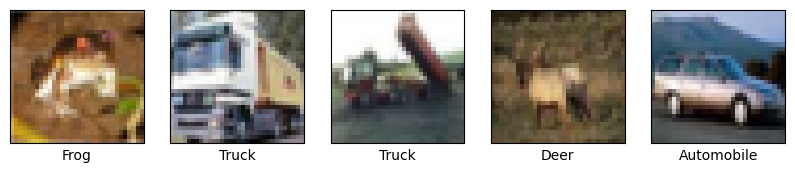

In [3]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_data[i])
    plt.xlabel(class_names[y_data[i][0]])
plt.show()


#### Printing The shape of the dataset and the count of unique labels. Also normalizing the pixel values

In [4]:
print("Dataset shape (images):", x_data.shape)
print("Dataset shape (labels):", y_data.shape)

unique_labels = np.unique(y_data)
print("Unique labels:", unique_labels)
print("Number of unique labels:", len(unique_labels))

x_data = x_data / 255.0
x_test = x_test / 255.0


Dataset shape (images): (50000, 32, 32, 3)
Dataset shape (labels): (50000, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


#### Spliting the dataset (80/20)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)


### 2.Build and train a CNN Model
#### Design a CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  

model.summary()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and training model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2142 - loss: 2.0708 - val_accuracy: 0.4502 - val_loss: 1.5496
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4314 - loss: 1.5530 - val_accuracy: 0.5214 - val_loss: 1.3511
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4983 - loss: 1.3889 - val_accuracy: 0.5648 - val_loss: 1.2393
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5332 - loss: 1.3083 - val_accuracy: 0.6099 - val_loss: 1.1161
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5636 - loss: 1.2273 - val_accuracy: 0.6075 - val_loss: 1.1005
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5873 - loss: 1.1703 - val_accuracy: 0.6525 - val_loss: 1.0094
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6053 - loss: 1.1262 - val_accuracy: 0.6462 - val_loss: 1.0167
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6153 - loss: 1.0926 - val_accuracy:

#### Plot Training and Validation Loss/Accuracy

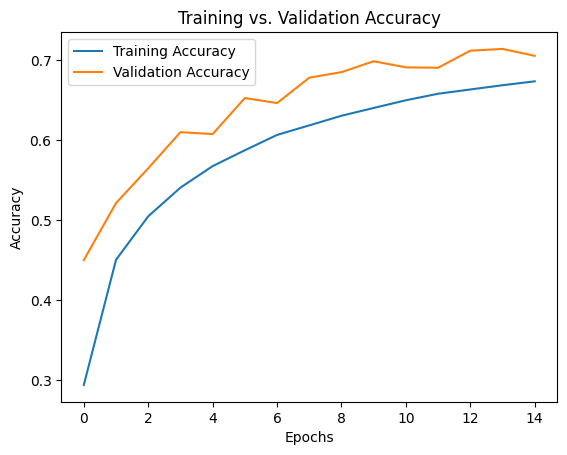

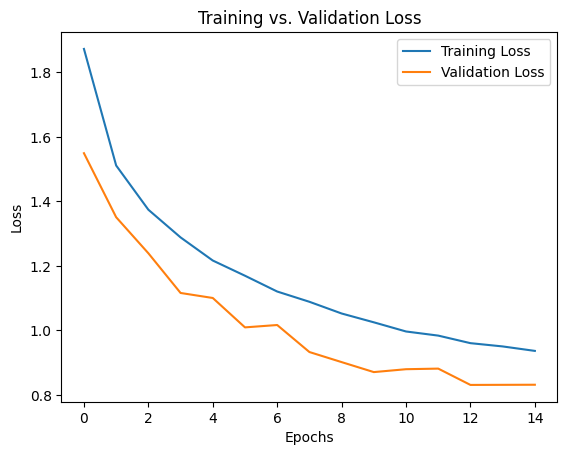

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

### 3. Model Evaluation
#### Evaluate the model on the test set and generating a report

In [9]:
y_test = tf.keras.utils.to_categorical(y_test, 10)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.7036 - loss: 0.8405
Test Accuracy: 70.36%


#### Confusion Matrix Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


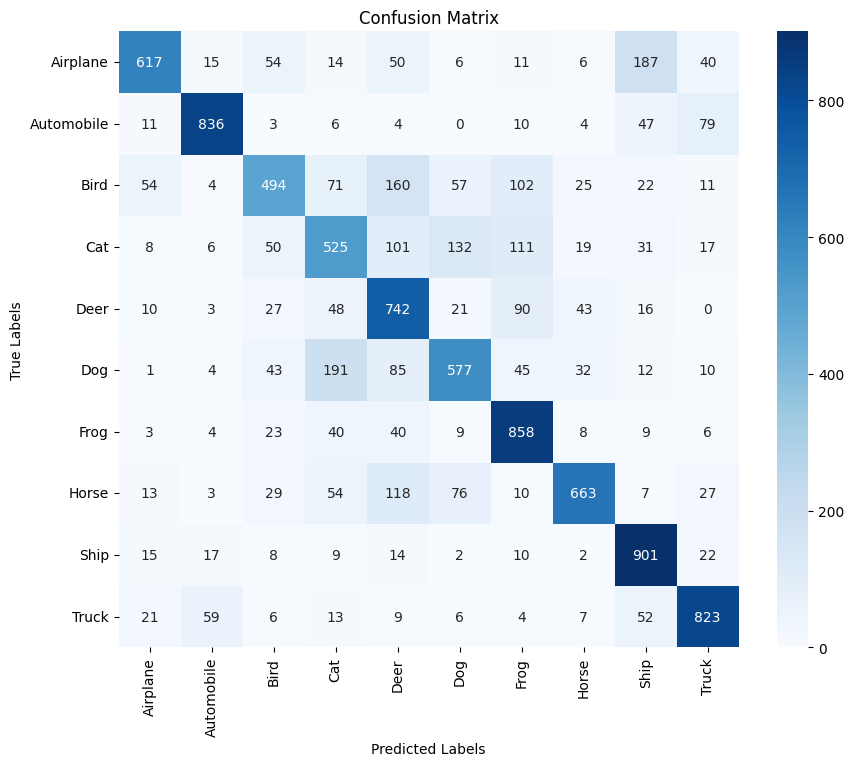

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.82      0.62      0.70      1000
  Automobile       0.88      0.84      0.86      1000
        Bird       0.67      0.49      0.57      1000
         Cat       0.54      0.53      0.53      1000
        Deer       0.56      0.74      0.64      1000
         Dog       0.65      0.58      0.61      1000
        Frog       0.69      0.86      0.76      1000
       Horse       0.82      0.66      0.73      1000
        Ship       0.70      0.90      0.79      1000
       Truck       0.80      0.82      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_test_classes = np.argmax(y_test, axis=1)  

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

#### Summary of Confusion Matrix

- Observations:
    - Strong performance on Automobile, Ship, and Truck classes with high precision, recall, and F1-scores.
    - Relatively weak performance on Bird, Cat, and Dog classes, indicating misclassifications are more frequent in these categories.
    - The model has a better recall on Deer and Frog, meaning it correctly identifies these classes more often.
    - The lower precision on Deer, Dog, and Cat suggests the model sometimes confuses these categories with others.

#### Examples of correctly and incorrectly classified images

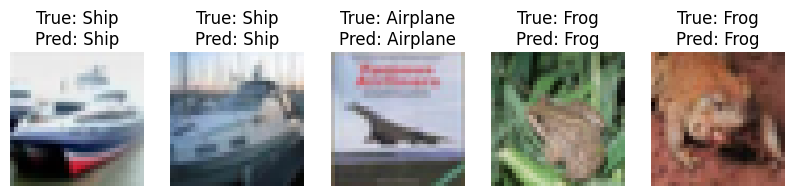

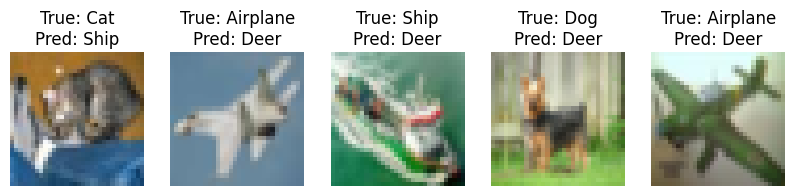

In [ ]:
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test_classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_test_classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.show()


### 4. Experimentation with Model Improvements
#### Using another optimizer (SGD)

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_sgd = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

test_loss_sgd, test_acc_sgd = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy with SGD: {test_acc_sgd * 100:.2f}%")


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1151 - loss: 3.9301 - val_accuracy: 0.0996 - val_loss: 2.3029
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0979 - loss: 2.3031 - val_accuracy: 0.1015 - val_loss: 2.3031
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0953 - loss: 2.3038 - val_accuracy: 0.0973 - val_loss: 2.3031
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0982 - loss: 2.3030 - val_accuracy: 0.0979 - val_loss: 2.3039
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1017 - loss: 2.3030 - val_accuracy: 0.0996 - val_loss: 2.3029
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1027 - loss: 2.3030 - val_accuracy: 0.1015 - val_loss: 2.3026
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0994 - loss: 2.3029 - val_accuracy: 0.1030 - val_loss: 2.3031
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0978 - loss: 2.3030 - val_accuracy: 

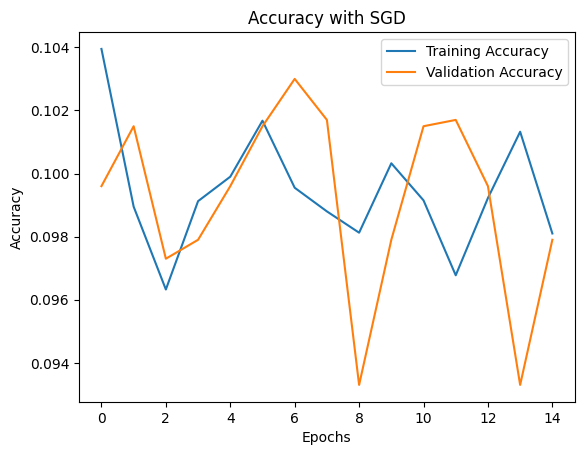

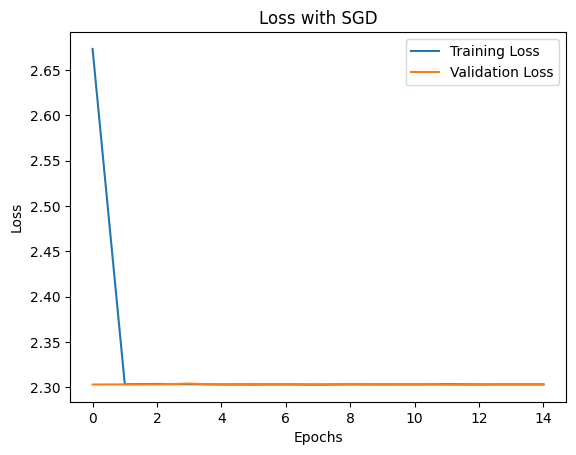

In [ ]:
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with SGD')
plt.show()

plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with SGD')
plt.show()


#### Showing the graphs for comparision

- Explanation
    - SGD updates weights more conservatively using a fixed learning rate, which may improve generalization.
    - Adding momentum helps accelerate learning by dampening oscillations in gradient updates.


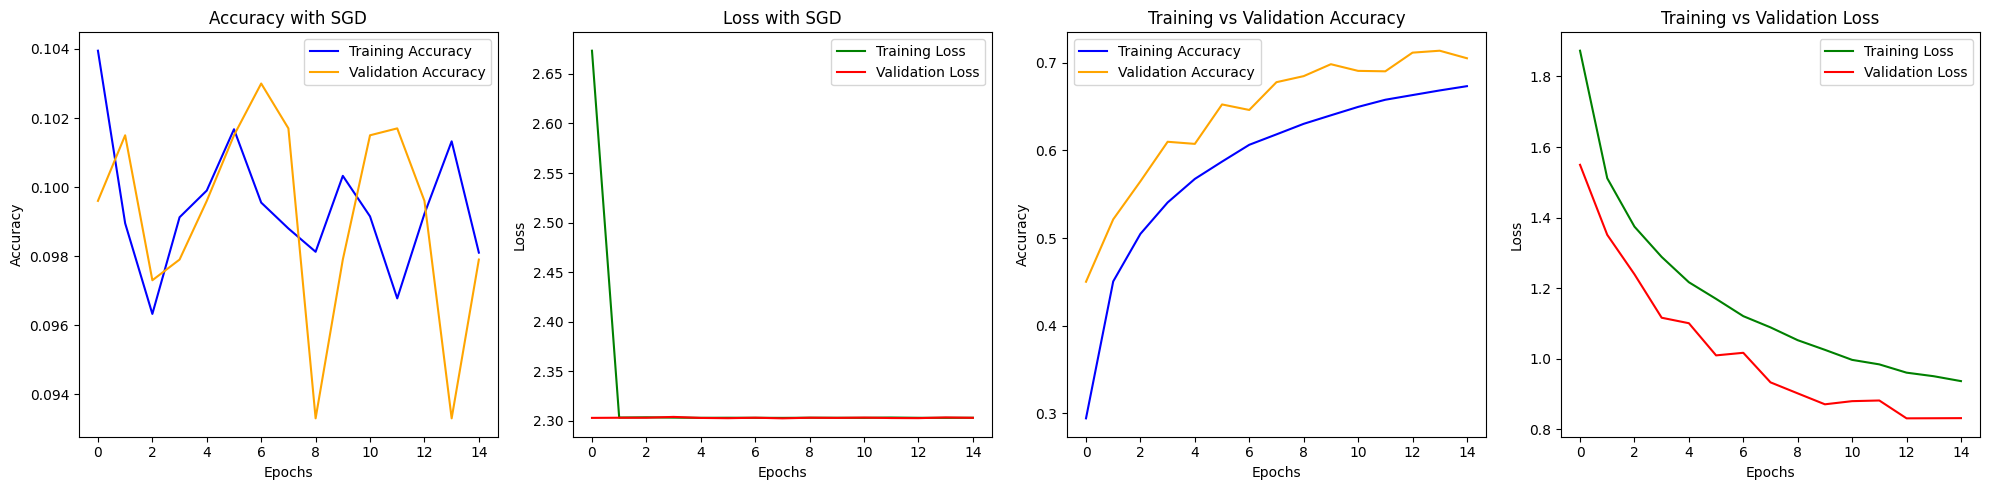

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(history_sgd.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history_sgd.history['val_accuracy'], label='Validation Accuracy', color='orange')
axs[0].set_title('Accuracy with SGD')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history_sgd.history['loss'], label='Training Loss', color='green')
axs[1].plot(history_sgd.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss with SGD')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[2].plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
axs[2].set_title('Training vs Validation Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Accuracy')
axs[2].legend()

axs[3].plot(history.history['loss'], label='Training Loss', color='green')
axs[3].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[3].set_title('Training vs Validation Loss')
axs[3].set_xlabel('Epochs')
axs[3].set_ylabel('Loss')
axs[3].legend()

plt.tight_layout()
plt.show()
